In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from ar6_ch6_rcmipfigs import constants

%load_ext autoreload
%autoreload 2

from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


In [3]:
first_y = '1750'
last_y = '2100'

**Set reference year for temperature change:**

In [4]:
ref_year = '2020'

# Code + figures

In [5]:
fn_uncertainty = INPUT_DATA_DIR /'chris_slcf_warming_ranges.csv'
df_uncertainty = pd.read_csv(fn_uncertainty, index_col=0)#.set_index('id')

# make sure base period/ref period are the same:
df_uncertainty = df_uncertainty[df_uncertainty['base_period']==int(ref_year)]
df_uncertainty#['scenario']#.uniqu
df_uncertainty
#diff_uncertainty = df_uncertainty - df_uncertainty['p50']

,scenario,forcing,base_period,year,p05,p16,p50,p84,p95
0,ssp119,ch4,2020,2020,0.000000,0.000000,0.000000,0.000000,0.000000
1,ssp119,ch4,2020,2021,0.001269,0.001477,0.001835,0.002353,0.002712
2,ssp119,ch4,2020,2022,0.002247,0.002632,0.003350,0.004357,0.005033
3,ssp119,ch4,2020,2023,0.002930,0.003454,0.004515,0.005940,0.006948
4,ssp119,ch4,2020,2024,0.003269,0.003947,0.005302,0.007098,0.008454
...,...,...,...,...,...,...,...,...,...
5665,ssp585,anthro,2020,2096,2.476599,2.774079,3.404203,4.182756,4.794687
5666,ssp585,anthro,2020,2097,2.508499,2.808320,3.448744,4.239259,4.858959
5667,ssp585,anthro,2020,2098,2.540093,2.843322,3.493960,4.295741,4.923941
5668,ssp585,anthro,2020,2099,2.571864,2.879303,3.539894,4.351773,4.988523


In [6]:
df_uncertainty['forcing'].unique()

array(['ch4', 'hfc', 'o3', 'aerosol', 'bc_on_snow', 'slcf', 'anthro'],
      dtype=object)

## Renaming to fit conventions:

#### variables:


    'ch4',
    'aerosol-total',
    'o3',
    'HFCs',
    'bc_on_snow']

In [7]:
dic_vars = dict(
    hfc='HFCs', 
    slcf='Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)', 
    aerosol='aerosol-total',
    anthro='total_anthropogenic'
)
dic_cols = dict(
    forcing='variable',
    
)


In [8]:
df_uncertainty['forcing'] = df_uncertainty['forcing'].replace(dic_vars)#.unique()
df_uncertainty = df_uncertainty.rename(dic_cols, axis=1)


In [9]:
percentiles =['p05','p16','p50','p84','p95']

In [10]:
ds = df_uncertainty.set_index(['scenario','variable','year', 'base_period']).to_xarray()

ds

<xarray.Dataset>
Dimensions:      (base_period: 1, scenario: 10, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'total_anthropogenic'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
Data variables:
    p05          (scenario, variable, year, base_period) float64 0.0 ... 2.604
    p16          (scenario, variable, year, base_period) float64 0.0 ... 2.914
    p50          (scenario, variable, year, base_period) float64 0.0 ... 3.583
    p84          (scenario, variable, year, base_period) float64 0.0 ... 4.409
    p95          (scenario, variable, year, base_period) float64 0.0 ... 5.051

In [11]:
ds.variable

<xarray.DataArray 'variable' (variable: 7)>
array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-total', 'bc_on_snow', 'ch4', 'o3', 'total_anthropogenic'],
      dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'total_anthropogenic'

In [12]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'

PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables' / 'table_sens_dT_cs_recommandetion.csv'
PATH_DT_OUTPUT = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris.nc'

**Output table found in:**

In [13]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_uncertainty_data_FaIR_chris.nc


## Imports:

In [14]:
import xarray as xr
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'
percentile = 'percentile'

## Set values:

ECS parameters:

Year to integrate from and to:

In [16]:
first_y = '1750'
last_y = '2100'

**Set reference year for temperature change:**

**Years to output change in**

In [17]:
years = ['2040', '2100']

In [18]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

# PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / '/dT_data_rcmip_models.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP_recommendation.nc'

In [19]:
ds_DT = xr.open_dataset(PATH_DT)

In [20]:
ds_DT#.scenario  # .climatemodel

<xarray.Dataset>
Dimensions:     (percentile: 1, scenario: 10, variable: 19, year: 351)
Coordinates:
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2097 2098 2099 2100
  * variable    (variable) object 'co2' 'ch4' ... 'aerosol-total-with_bc' 'HFCs'
  * scenario    (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'
  * percentile  (percentile) object 'recommendation'
Data variables:
    ERF         (scenario, variable, year) float64 ...
    time        (year) datetime64[ns] ...
    delta_t     (year) float64 ...
    Delta T     (percentile, scenario, variable, year) float64 ...

In [21]:
ds

<xarray.Dataset>
Dimensions:      (base_period: 1, scenario: 10, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'total_anthropogenic'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
Data variables:
    p05          (scenario, variable, year, base_period) float64 0.0 ... 2.604
    p16          (scenario, variable, year, base_period) float64 0.0 ... 2.914
    p50          (scenario, variable, year, base_period) float64 0.0 ... 3.583
    p84          (scenario, variable, year, base_period) float64 0.0 ... 4.409
    p95          (scenario, variable, year, base_period) float64 0.0 ... 5.051

In [22]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_c_dic, \
    get_scenario_ls_dic

# scenario colors and linestyle
cdic = get_scenario_c_dic()
lsdic = get_scenario_ls_dic()  # get_ls_dic(ds_DT[climatemodel].values)


<IPython.core.display.Javascript object>

In [23]:
ds_DT.scenario

<xarray.DataArray 'scenario' (scenario: 10)>
array(['ssp534-over', 'ssp370-lowNTCF-gidden', 'ssp119', 'ssp370', 'ssp434',
       'ssp460', 'ssp585', 'ssp126', 'ssp245', 'ssp370-lowNTCF-aerchemmip'],
      dtype=object)
Coordinates:
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'

In [24]:
ds_DT.variable


<xarray.DataArray 'variable' (variable: 19)>
array(['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
       'contrails', 'aerosol-radiation_interactions',
       'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic',
       'solar', 'total_anthropogenic', 'total_natural', 'total',
       'aerosol-total', 'aerosol-total-with_bc', 'HFCs'], dtype=object)
Coordinates:
  * variable  (variable) object 'co2' 'ch4' ... 'aerosol-total-with_bc' 'HFCs'

In [25]:
scenario
scenarios_fl = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                'ssp370-lowNTCF-gidden',
                'ssp585']

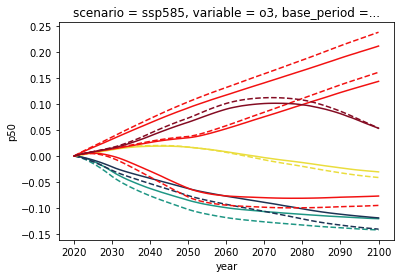

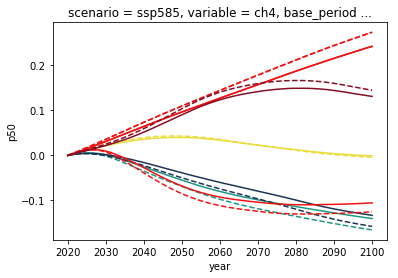

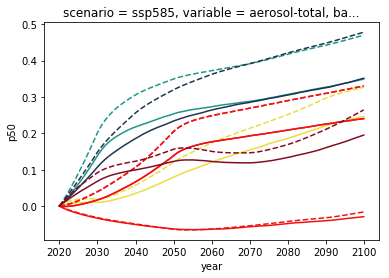

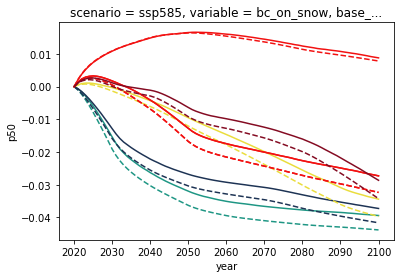

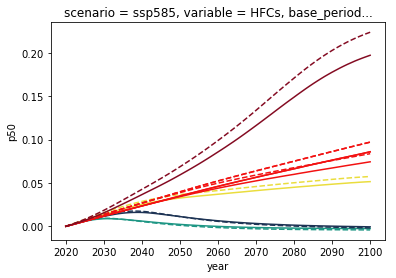

In [26]:

for var in ['o3','ch4','aerosol-total','bc_on_snow','HFCs']:
    for scn in scenarios_fl:
        pl_da = ds_DT['Delta T'].sel(variable=var, year=slice(2020,2100), scenario=scn, percentile='recommendation')-ds_DT['Delta T'].sel(variable=var, year=2020, scenario=scn, percentile='recommendation')

        pl_da.plot(linestyle = 'dashed', label=scn, c=cdic[scn])
        
        pl_da = ds['p50'].sel(variable=var, year=slice(2020,2100), scenario=scn)#, percentile='recommendation')
        pl_da.plot(linestyle = 'solid', label=scn, c=cdic[scn])
    plt.show()

## Make difference and save:

In [27]:
percentiles


['p05', 'p16', 'p50', 'p84', 'p95']

In [28]:
p50= 'p50'
for perc in percentiles:
    nvn = f'{perc}-p50'
    ds[nvn] = ds[perc] -ds[p50]
    print(nvn)
ds

p05-p50
p16-p50
p50-p50
p84-p50
p95-p50


<xarray.Dataset>
Dimensions:      (base_period: 1, scenario: 10, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'total_anthropogenic'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
Data variables:
    p05          (scenario, variable, year, base_period) float64 0.0 ... 2.604
    p16          (scenario, variable, year, base_period) float64 0.0 ... 2.914
    p50          (scenario, variable, year, base_period) float64 0.0 ... 3.583
    p84          (scenario, variable, year, base_period) float64 0.0 ... 4.409
    p95          (scenario, variable, year, base_period) float64 0.0 ... 5.051
    p05-p50      (scenario, variable, year, base_period) float64 0.0 ... -0.9797
    p16-p50      (scenario, variable, year, base_period) float64 0.0 ... -0.669
    p50-p50      (scenario, variable, year, base_period) float64 0.0 0.0 ... 0.0
    p84-p50      (scenario, variable, year, base_period) float64 0.0 ... 0.8254
    p95-p50      (scenario, variable, year, base_period) float64 0.0 ... 1.468

In [29]:
PATH_DT_OUTPUT

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_uncertainty_data_FaIR_chris.nc')

In [30]:
ds.to_netcdf(PATH_DT_OUTPUT)

## Comparison with old version

In [31]:
fn_uncertainty_o = INPUT_DATA_DIR /'slcf_warming_ranges_old.csv'
df_uncertainty_o = pd.read_csv(fn_uncertainty_o, index_col=0)#.set_index('id')

# make sure base period/ref period are the same:
df_uncertainty_o = df_uncertainty_o[df_uncertainty_o['base_period']==int(ref_year)]
df_uncertainty_o#['scenario']#.uniqu
#diff_uncertainty = df_uncertainty - df_uncertainty['p50']

,scenario,forcing,base_period,year,p05,p16,p50,p84,p95
0,ssp119,ch4,2020,2020,0.000000,0.000000,0.000000,0.000000,0.000000
1,ssp119,ch4,2020,2021,0.001217,0.001424,0.001799,0.002359,0.002796
2,ssp119,ch4,2020,2022,0.002162,0.002547,0.003276,0.004365,0.005238
3,ssp119,ch4,2020,2023,0.002799,0.003353,0.004393,0.005970,0.007246
4,ssp119,ch4,2020,2024,0.003127,0.003815,0.005125,0.007147,0.008850
...,...,...,...,...,...,...,...,...,...
5665,ssp585,anthro,2020,2096,2.414035,2.745542,3.375208,4.241771,4.928117
5666,ssp585,anthro,2020,2097,2.444173,2.780960,3.419501,4.299079,4.995392
5667,ssp585,anthro,2020,2098,2.475532,2.816396,3.463092,4.357588,5.062269
5668,ssp585,anthro,2020,2099,2.506110,2.852463,3.506855,4.417798,5.129299


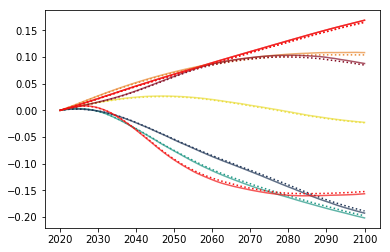

In [32]:
var = 'ch4'
perc = 'p05'

cdic = get_scenario_c_dic()
for scn in cdic.keys():
    pl_n= df_uncertainty#
    pl_n = pl_n[pl_n['variable']==var]
    pl_n = pl_n[pl_n['scenario']==scn]
    plt.plot(pl_n['year'], pl_n[perc], c=cdic[scn], alpha=0.7)
    pl_n= df_uncertainty_o#
    pl_n = pl_n[pl_n['forcing']==var]
    pl_n = pl_n[pl_n['scenario']==scn]
    plt.plot(pl_n['year'], pl_n[perc], c=cdic[scn], linestyle='dotted')

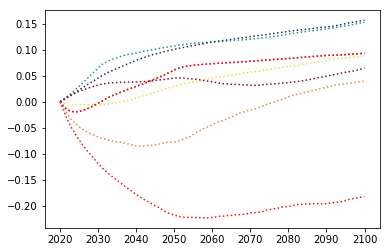

In [33]:
var = 'aerosol'
perc = 'p05'

cdic = get_scenario_c_dic()
for scn in cdic.keys():
    pl_n= df_uncertainty#
    pl_n = pl_n[pl_n['variable']==var]
    pl_n = pl_n[pl_n['scenario']==scn]
    plt.plot(pl_n['year'], pl_n[perc], c=cdic[scn], alpha=0.7)
    pl_n= df_uncertainty_o#
    pl_n = pl_n[pl_n['forcing']==var]
    pl_n = pl_n[pl_n['scenario']==scn]
    plt.plot(pl_n['year'], pl_n[perc], c=cdic[scn], linestyle='dotted')

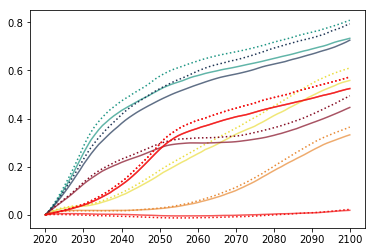

In [34]:
var = 'aerosol-total'
var2 = 'aerosol'
perc = 'p95'

cdic = get_scenario_c_dic()
for scn in cdic.keys():
    pl_n= df_uncertainty#
    pl_n = pl_n[pl_n['variable']==var]
    pl_n = pl_n[pl_n['scenario']==scn]
    plt.plot(pl_n['year'], pl_n[perc], c=cdic[scn], alpha=0.7)
    pl_n= df_uncertainty_o#
    pl_n = pl_n[pl_n['forcing']==var2]
    pl_n = pl_n[pl_n['scenario']==scn]
    plt.plot(pl_n['year'], pl_n[perc], c=cdic[scn], linestyle='dotted')